In [40]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/user/Downloads/AI-class-main/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [42]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

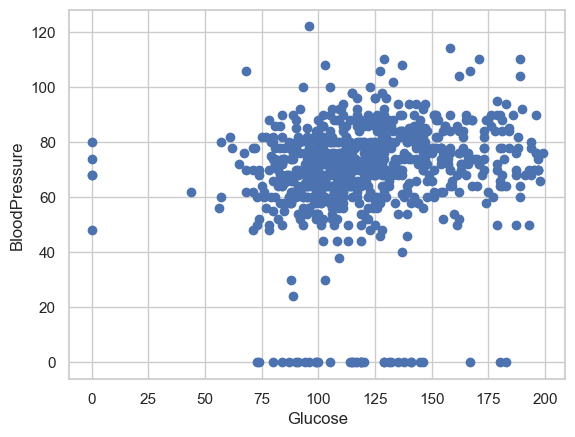

In [44]:
# 산점도
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Glucose'], df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

plt.show()

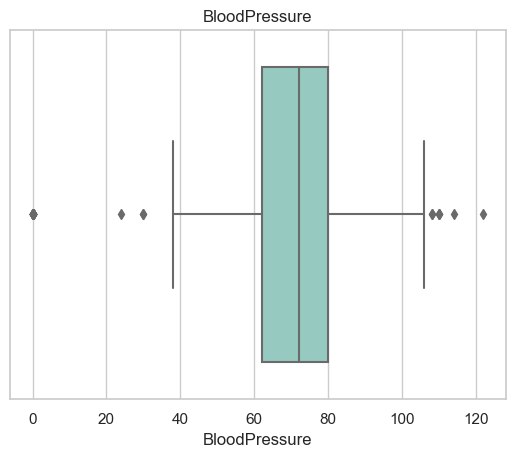

In [45]:
# boxplot
sns.set_theme(style="whitegrid")
sns.boxplot(x="BloodPressure", data=df, palette="Set3")
plt.title("BloodPressure")
plt.show()

In [46]:
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [47]:
y=df['Outcome']

In [48]:
# 레이블 확인
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Text(0.5, 1.0, 'Outcome')

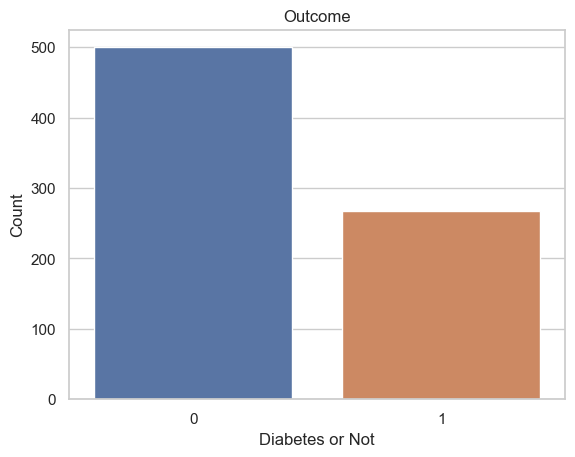

In [49]:
# 레이블 확인
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [50]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(df)
print(standard_df)

[[ 0.84832379  0.14964075  0.90726993 ...  0.46849198  1.4259954
   1.36589591]
 [-1.12339636 -0.16054575  0.53090156 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.94372388 -0.26394125 -1.28821221 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.00330087  0.14964075  0.15453319 ... -0.68519336 -0.27575966
  -0.73212021]
 [ 0.1597866  -0.47073225 -1.28821221 ... -0.37110101  1.17073215
   1.36589591]
 [-0.8730192   0.04624525  0.65635768 ... -0.47378505 -0.87137393
  -0.73212021]]


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df)
print(minmax_df)

[[0.74371859 0.59016393 0.35353535 ... 0.23441503 0.48333333 1.        ]
 [0.42713568 0.54098361 0.29292929 ... 0.11656704 0.16666667 0.        ]
 [0.91959799 0.52459016 0.         ... 0.25362938 0.18333333 1.        ]
 ...
 [0.6080402  0.59016393 0.23232323 ... 0.07130658 0.15       0.        ]
 [0.63316583 0.49180328 0.         ... 0.11571307 0.43333333 1.        ]
 [0.46733668 0.57377049 0.31313131 ... 0.10119556 0.03333333 0.        ]]


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [54]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.78125
[[119  11]
 [ 31  31]]


In [55]:
# Build a logistic regression classifier and predict
# train
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)
# predict
pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[116  14]
 [ 26  36]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
